In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

Dataseti ekliyorum :

AlexNet için giriş boyutu 227x227x3 olduğundan Target Size'ını (227,227) olarak değiştirmeliyim. 
Varsayılan Batch Size 32'dir.

In [16]:
train_path = '/content/gdrive/MyDrive/ImageClassificationDataSet/seg_train/seg_train'
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(train_path, target_size=(227,227), class_mode='categorical')
print(train.classes)

Found 3507 images belonging to 5 classes.
[0 0 0 ... 4 4 4]


In [17]:
type(train)

keras.preprocessing.image.DirectoryIterator

In [18]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

train() ve train_datagen()'in type'ını öğrenmek şu bilgilere ulaşmamı sağladı :

keras.preprocessing.image.DirectoryIterator, diskteki bir dizinden görüntüleri okuyabilen yineleyicidir.                                                
keras.preprocessing.image.ImageDataGenerator, gerçek zamanlı veri artırma(data augmentation) ile görüntü yığınları oluşturur.



İlk görüntünün boyutlarını ve onun bağlantılı olduğu first batch outputunu kontrol etmek istiyorum. 

In [19]:
print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 5)
Image Size of first image :  (227, 227, 3)
Output of first image :  (5,)


Burada datasetteki bazı örnekleri görmek istiyorum : 
Bu örnekler, 1. Batch'de her kategori(sınıf) için herhangi "1" resimi gösterir.

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 1. 0. 0.]')

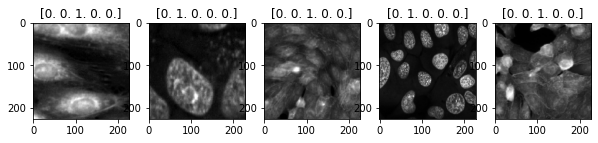

In [25]:
fig , axs = plt.subplots(1,5 ,figsize = (10,10))

axs[0].imshow(train[0][0][12])
axs[0].set_title(train[0][1][12])

axs[1].imshow(train[0][0][10])
axs[1].set_title(train[0][1][10])

axs[2].imshow(train[0][0][15])
axs[2].set_title(train[0][1][15])

axs[3].imshow(train[0][0][20])
axs[3].set_title(train[0][1][20])

axs[4].imshow(train[0][0][3])
axs[4].set_title(train[0][1][3])

# MODEL

In [26]:
def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(5,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')

    
    return model

Bu fonksiyon modeli döndürecek : 

In [27]:
alex = AlexNet(train[0][0].shape[1:])

Modeli özetliyorum :

In [28]:
alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

Şimdi, "Adam Optimizer" kullanarak ve "categorical_crossentropy" olarak kaybı seçeceğim, doğruluk ölçütleriyle (loss ve accuracy değerleri ile) modeli ölçeceğim :  

In [29]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [30]:
alex.fit(train,epochs=10)

Epoch 1/10
110/110 [==============================] - 569s 5s/step - loss: 5.5093 - accuracy: 0.4528
Epoch 2/10
110/110 [==============================] - 557s 5s/step - loss: 0.7407 - accuracy: 0.7146
Epoch 3/10
110/110 [==============================] - 557s 5s/step - loss: 0.6167 - accuracy: 0.7642
Epoch 4/10
110/110 [==============================] - 566s 5s/step - loss: 0.5254 - accuracy: 0.8072
Epoch 5/10
110/110 [==============================] - 564s 5s/step - loss: 0.4627 - accuracy: 0.8380
Epoch 6/10
110/110 [==============================] - 563s 5s/step - loss: 0.4143 - accuracy: 0.8563
Epoch 7/10
110/110 [==============================] - 560s 5s/step - loss: 0.3747 - accuracy: 0.8691
Epoch 8/10
110/110 [==============================] - 560s 5s/step - loss: 0.3818 - accuracy: 0.8648
Epoch 9/10
110/110 [==============================] - 561s 5s/step - loss: 0.3578 - accuracy: 0.8745
Epoch 10/10
110/110 [==============================] - 558s 5s/step - loss: 0.3263 - accura

# TEST

In [31]:
path_test = '/content/gdrive/MyDrive/ImageClassificationDataSet/seg_test/seg_test'
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 1000 images belonging to 5 classes.


Şimdi modeli test verileri üzerinde deneyeceğim :

In [32]:
preds = alex.evaluate(test)

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

32/32 [==============================] - 181s 6s/step - loss: 0.7547 - accuracy: 0.7580
Loss = 0.7547318935394287
Test Accuracy = 0.7580000162124634


Şimdi de modeli "Predicted Image" denilen tahmin verileri üzerinde deneyeceğim : 

In [33]:
path_test = '/content/gdrive/MyDrive/ImageClassificationDataSet/seg_pred'
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_test, target_size=(227,227), batch_size = 1,class_mode='categorical')

Found 500 images belonging to 1 classes.


In [34]:
predictions = alex.predict(predict)

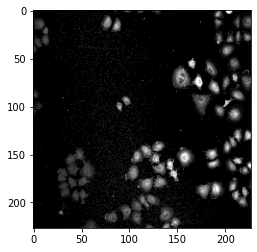

In [35]:
imshow(predict[400][0][0])
plt.imsave("predicted1.png",predict[400][0][0])

Tahminini almak için :

Bu, modelin çıktısıdır.
Son katmanda softmax kullandığımdan, model bu belirli görüntü girişi için her kategori için olasılıkları döndürür. 


In [36]:
print(predictions[400])

[1.4962483e-13 4.3674773e-12 6.5184035e-16 1.1348092e-12 1.0000000e+00]


In [37]:
import os 
def get_category(predicted_output):
    path ='/content/gdrive/MyDrive/ImageClassificationDataSet/seg_train/seg_train'
    return os.listdir(path)[np.argmax(predicted_output)]

In [ ]:
print(get_category(predictions[400]))

hdac_inhibitor


Text(0.5, 1.0, '02-004')

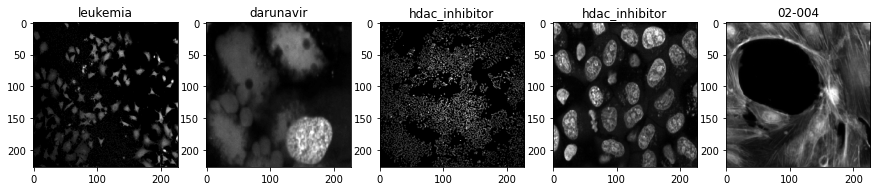

In [39]:
fig , axs = plt.subplots(1,5 ,figsize = (15,15))

axs[0].imshow(predict[100][0][0])
axs[0].set_title(get_category(predictions[100]))

axs[1].imshow(predict[22][0][0])
axs[1].set_title(get_category(predictions[22]))

axs[2].imshow(predict[300][0][0])
axs[2].set_title(get_category(predictions[300]))

axs[3].imshow(predict[40][0][0])
axs[3].set_title(get_category(predictions[40]))

axs[4].imshow(predict[200][0][0])
axs[4].set_title(get_category(predictions[200]))